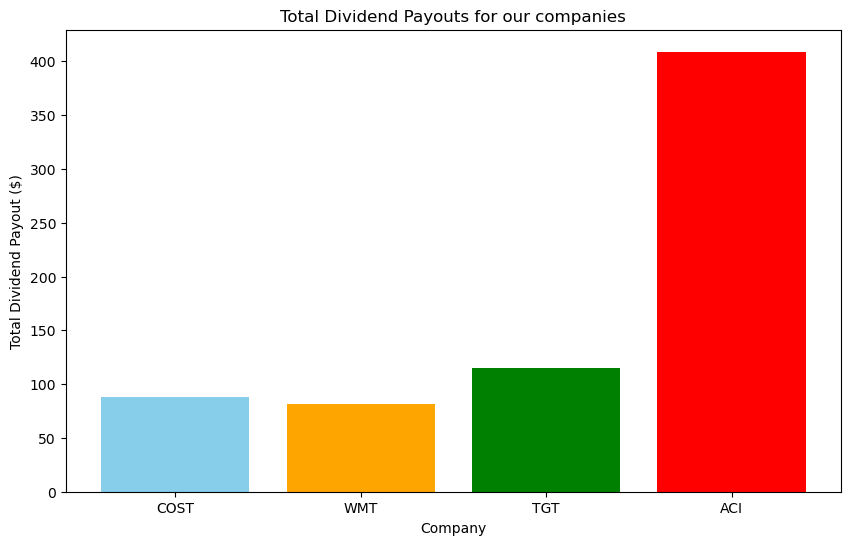

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Read dividend payout data for all four companies
dividend_data_cost = pd.read_csv('COST Dividend Data.csv')
dividend_data_wmt = pd.read_csv('WMT Dividend Data.csv')
dividend_data_tgt = pd.read_csv('TGT Dividend Data.csv')
dividend_data_aci = pd.read_csv('ACI Dividend Data.csv')

# Convert 'Date' column to datetime with correct format for all companies
for df in [dividend_data_cost, dividend_data_wmt, dividend_data_tgt, dividend_data_aci]:
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Read daily stock price data for all four companies
stock_price_data_cost = pd.read_csv('COST.csv')
stock_price_data_wmt = pd.read_csv('WMT.csv')
stock_price_data_tgt = pd.read_csv('TGT.csv')
stock_price_data_aci = pd.read_csv('ACI.csv')

# Convert 'Date' column to datetime with correct format for all companies
for df in [stock_price_data_cost, stock_price_data_wmt, stock_price_data_tgt, stock_price_data_aci]:
    df['Date'] = pd.to_datetime(df['Date'])

# Merge dividend payout data with stock price data based on nearest dates for all companies
merged_data_cost = pd.merge_asof(dividend_data_cost, stock_price_data_cost, on='Date', direction='nearest')
merged_data_wmt = pd.merge_asof(dividend_data_wmt, stock_price_data_wmt, on='Date', direction='nearest')
merged_data_tgt = pd.merge_asof(dividend_data_tgt, stock_price_data_tgt, on='Date', direction='nearest')
merged_data_aci = pd.merge_asof(dividend_data_aci, stock_price_data_aci, on='Date', direction='nearest')

# Calculate dividend payout amount based on stock prices for all companies
merged_data_cost['Dividend_Payout'] = merged_data_cost['Dividends'] * (1000 / merged_data_cost['Close'])
merged_data_wmt['Dividend_Payout'] = merged_data_wmt['Dividends'] * (1000 / merged_data_wmt['Close'])
merged_data_tgt['Dividend_Payout'] = merged_data_tgt['Dividends'] * (1000 / merged_data_tgt['Close'])
merged_data_aci['Dividend_Payout'] = merged_data_aci['Dividends'] * (1000 / merged_data_aci['Close'])

# Calculate total payout for all companies
total_payout_cost = merged_data_cost['Dividend_Payout'].sum()
total_payout_wmt = merged_data_wmt['Dividend_Payout'].sum()
total_payout_tgt = merged_data_tgt['Dividend_Payout'].sum()
total_payout_aci = merged_data_aci['Dividend_Payout'].sum()

# Create a bar chart showing total dividend payouts for all four companies
plt.figure(figsize=(10, 6))
companies = ['COST', 'WMT', 'TGT', 'ACI']
total_payouts = [total_payout_cost, total_payout_wmt, total_payout_tgt, total_payout_aci]
plt.bar(companies, total_payouts, color=['skyblue', 'orange', 'green', 'red'])

# Adding labels and title
plt.xlabel('Company')
plt.ylabel('Total Dividend Payout ($)')
plt.title('Total Dividend Payouts for our companies')

# Show plot
plt.show()
